In [11]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [46]:
##word level data for word 'pregnancy'
df = pd.read_csv('/home/qianwang/Downloads/test1.csv')
df.head()


,Unnamed: 0,date,doc
0,1858,2015-12-01,3
1,1859,2015-12-02,8
2,1860,2015-12-03,5
3,1861,2015-12-04,5
4,1862,2015-12-05,4


In [51]:
df = df[['date','doc']]
df.head()

,date,doc
0,2015-12-01,3
1,2015-12-02,8
2,2015-12-03,5
3,2015-12-04,5
4,2015-12-05,4


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1858 non-null   object
 1   doc     1858 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.2+ KB


In [74]:

training_set = df.iloc[:1678, 1:2].values
test_set = df.iloc[1678:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1678):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [75]:

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:1678, 1:2]
dataset_test = df.iloc[1678:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 240):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Epoch 1/100
51/51 [==============================] - 5s 38ms/step - loss: 0.0197
Epoch 2/100
51/51 [==============================] - 2s 37ms/step - loss: 0.0102
Epoch 3/100
51/51 [==============================] - 2s 37ms/step - loss: 0.0115
Epoch 4/100
51/51 [==============================] - 2s 36ms/step - loss: 0.0103
Epoch 5/100
51/51 [==============================] - 2s 37ms/step - loss: 0.0104
Epoch 6/100
51/51 [==============================] - 2s 36ms/step - loss: 0.0094
Epoch 7/100
51/51 [==============================] - 2s 36ms/step - loss: 0.0094
Epoch 8/100
51/51 [==============================] - 2s 36ms/step - loss: 0.0099
Epoch 9/100
51/51 [==============================] - 2s 36ms/step - loss: 0.0094
Epoch 10/100
51/51 [==============================] - 2s 35ms/step - loss: 0.0091
Epoch 11/100
51/51 [==============================] - 2s 35ms/step - loss: 0.0096
Epoch 12/100
51/51 [==============================] - 2s 35ms/step - loss: 0.0104
Epoch 13/100
51/51 [=====

In [76]:
len(predicted_stock_price)

180

In [77]:
len(dataset_test.values)

180

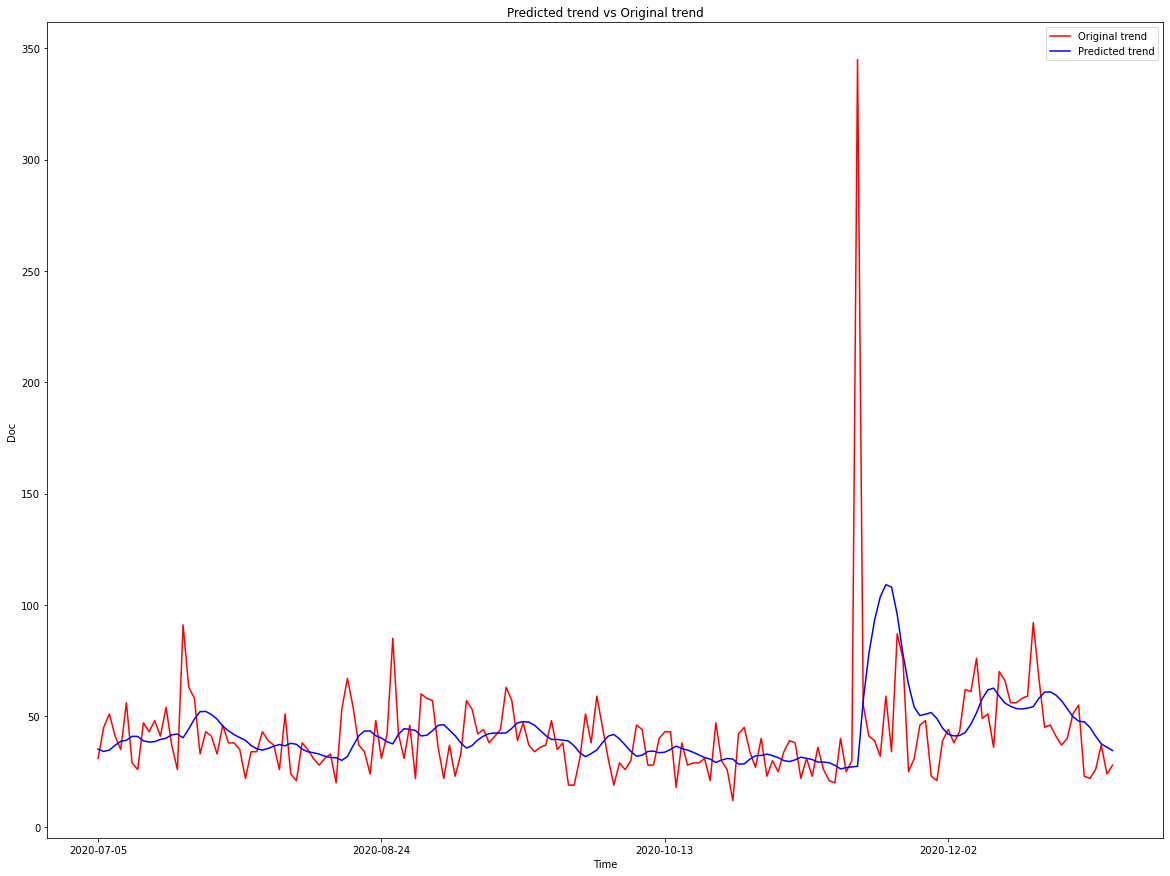

In [80]:
# Visualising the results
plt.figure(figsize=(20,15))
plt.plot(df.loc[1678:, 'date'],dataset_test.values, color = 'red', label = 'Original trend')
plt.plot(df.loc[1678:, 'date'],predicted_stock_price, color = 'blue', label = 'Predicted trend')
plt.xticks(np.arange(0,180,50))
plt.title('Predicted trend vs Original trend')
plt.xlabel('Time')
plt.ylabel('Doc')
plt.legend()
plt.show()